In [2]:
import pandas as pd

# Read as space-separated (whitespace)
df = pd.read_csv('/content/housing.csv', sep='\s+', header=None)

# Assign proper column names
df.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (506, 14)
Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2352491749.py:4: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('/content/housing.csv', sep='\s+', header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
import numpy as np

print(df.shape)
display(df.head(5))
display(df.describe().T)

# Check nulls & duplicates
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Target distribution quick stats
print("\nMEDV stats → min/mean/median/max:")
print(df['MEDV'].min(), df['MEDV'].mean().round(2), df['MEDV'].median(), df['MEDV'].max())

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000



Missing values per column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Duplicate rows: 0

MEDV stats → min/mean/median/max:
5.0 22.53 21.2 50.0


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

linreg_pipe.fit(X_train, y_train)

# Evaluate
pred_train = linreg_pipe.predict(X_train)
pred_test  = linreg_pipe.predict(X_test)

def eval_reg(y_true, y_pred, split='TEST'):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"[{split}] RMSE={rmse:.3f} | MAE={mae:.3f} | R2={r2:.3f}")

eval_reg(y_train, pred_train, split='TRAIN')
eval_reg(y_test,  pred_test,  split='TEST')

[TRAIN] RMSE=4.652 | MAE=3.315 | R2=0.751
[TEST] RMSE=4.929 | MAE=3.189 | R2=0.669


In [9]:

coefs = linreg_pipe.named_steps['model'].coef_
feat_importance = pd.Series(coefs, index=X.columns).sort_values(key=abs, ascending=False)
feat_importance

,0
LSTAT,-3.611658
RM,3.145240
DIS,-3.081908
RAD,2.251407
PTRATIO,-2.037752
NOX,-2.022319
TAX,-1.767014
B,1.129568
CRIM,-1.002135
CHAS,0.718738


In [10]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

models = {
    "Linear": linreg_pipe,
    "Ridge": Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=1.0))]),
    "Lasso": Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha=0.05, max_iter=5000))]),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae  = mean_absolute_error(y_test, preds)
    r2   = r2_score(y_test, preds)
    results.append([name, rmse, mae, r2])

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"])
results_df.sort_values("R2", ascending=False)

,Model,RMSE,MAE,R2
3,RandomForest,2.917225,2.041314,0.883953
0,Linear,4.928602,3.189092,0.668759
1,Ridge,4.930812,3.185724,0.668462
2,Lasso,4.973211,3.185771,0.662736


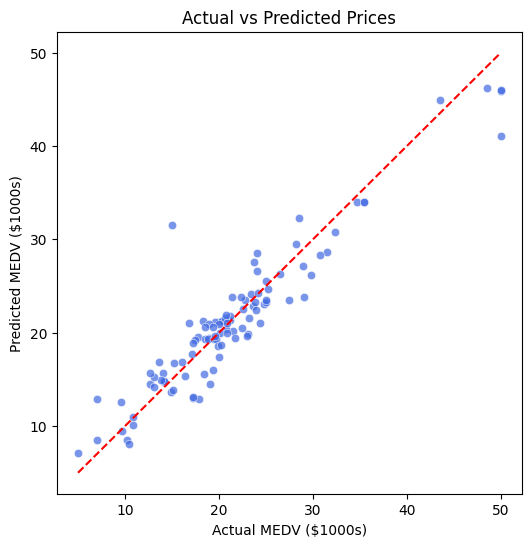

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# pick the best model
best_model = models['RandomForest']
preds = best_model.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=preds, alpha=0.7, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual MEDV ($1000s)')
plt.ylabel('Predicted MEDV ($1000s)')
plt.show()

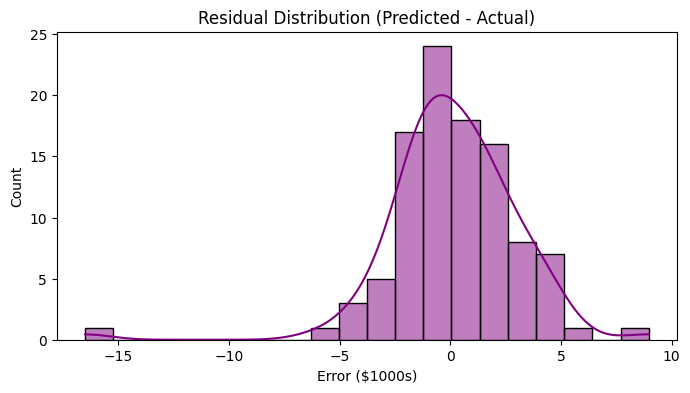

In [12]:
residuals = y_test - preds

plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residual Distribution (Predicted - Actual)')
plt.xlabel('Error ($1000s)')
plt.show()

In [13]:
df.to_csv("housing_cleaned.csv", index=False)


In [14]:
pred_df = pd.DataFrame({
    "Actual_MEDV": y_test,
    "Predicted_MEDV": preds
})
pred_df.to_csv("housing_predictions.csv", index=False)